In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings            
warnings.filterwarnings("ignore") 

from pandas.plotting import parallel_coordinates

In [2]:
#load datas from csv files
data_2015 = pd.read_csv('world_happiness_report/2015.csv')
data_2016 = pd.read_csv('world_happiness_report/2016.csv')
data_2017 = pd.read_csv('world_happiness_report/2017.csv')
data_2018 = pd.read_csv('world_happiness_report/2018.csv')
data_2019 = pd.read_csv('world_happiness_report/2019.csv')

In [3]:
#Table of 2015 happiness data:
data_2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [4]:
data_2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [5]:
# Editing the name of the parameters in the csv file
# Preprocessing data
data_2015.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2015.columns]
data_2016.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2016.columns]
data_2017.columns=[each.replace("."," ") for each in data_2017.columns]
data_2017.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2017.columns]
data_2018.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2018.columns]


In [6]:
data_2019 = data_2019.rename(columns = {'Score': 'Happiness_Score', 'Freedom to make life choices': 'Freedom',
                                       'Healthy life expectancy':'Health'}, inplace=False)
data_2019.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2019.columns]

In [7]:
data_2018=data_2018.rename(columns = {'Score':'Happiness_Score'}, inplace=False)

In [8]:
data_2018

Overall_rank                   Country  Happiness_Score    GDP  \
0               1                   Finland            7.632  1.305   
1               2                    Norway            7.594  1.456   
2               3                   Denmark            7.555  1.351   
3               4                   Iceland            7.495  1.343   
4               5               Switzerland            7.487  1.420   
..            ...                       ...              ...    ...   
151           152                     Yemen            3.355  0.442   
152           153                  Tanzania            3.303  0.455   
153           154               South Sudan            3.254  0.337   
154           155  Central African Republic            3.083  0.024   
155           156                   Burundi            2.905  0.091   

     Social_support  Healthy  Freedom  Generosity  Perceptions  
0             1.592    0.874    0.681       0.202        0.393  
1             1.582    0.861    0.686       0.286        0.340  
2             1.590    0.868    0.683       0.284        0.408  
3             1.644    0.914    0.677       0.353        0.138  
4             1.549    0.927    0.660       0.256        0.357  
..              ...      ...      ...         ...          ...  
151           1.073    0.343    0.244       0.083        0.064  
152           0.991    0.381    0.481       0.270        0.097  
153           0.608    0.177    0.112       0.224        0.106  
154           0.000    0.010    0.305       0.218        0.038  
155           0.627    0.145    0.065       0.149        0.076  

[156 rows x 9 columns]

In [9]:
data_2015

Country                           Region  Happiness_Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness_Score  Standard_Error  Economy   Family   Health  Freedom  \
0              7.587         0.03411  1.39651  1.34951  0.94143  0.66557   
1              7.561         0.04884  1.30232  1.40223  0.94784  0.62877   
2              7.527         0.03328  1.32548  1.36058  0.87464  0.64938   
3              7.522         0.03880  1.45900  1.33095  0.88521  0.66973   
4              7.427         0.03553  1.32629  1.32261  0.90563  0.63297   
..               ...             ...      ...      ...      ...      ...   
153            3.465         0.03464  0.22208  0.77370  0.42864  0.59201   
154            3.340         0.03656  0.28665  0.35386  0.31910  0.48450   
155            3.006         0.05015  0.66320  0.47489  0.72193  0.15684   
156            2.905         0.08658  0.01530  0.41587  0.22396  0.11850   
157            2.839         0.06727  0.20868  0.13995  0.28443  0.36453   

       Trust  Generosity  Dystopia_Residual  
0    0.41978     0.29678            2.51738  
1    0.14145     0.43630            2.70201  
2    0.48357     0.34139            2.49204  
3    0.36503     0.34699            2.46531  
4    0.32957     0.45811            2.45176  
..       ...         ...                ...  
153  0.55191     0.22628            0.67042  
154  0.08010     0.18260            1.63328  
155  0.18906     0.47179            0.32858  
156  0.10062     0.19727            1.83302  
157  0.10731     0.16681            1.56726  

[158 rows x 12 columns]

In [10]:
data_2015

Country                           Region  Happiness_Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness_Score  Standard_Error  Economy   Family   Health  Freedom  \
0              7.587         0.03411  1.39651  1.34951  0.94143  0.66557   
1              7.561         0.04884  1.30232  1.40223  0.94784  0.62877   
2              7.527         0.03328  1.32548  1.36058  0.87464  0.64938   
3              7.522         0.03880  1.45900  1.33095  0.88521  0.66973   
4              7.427         0.03553  1.32629  1.32261  0.90563  0.63297   
..               ...             ...      ...      ...      ...      ...   
153            3.465         0.03464  0.22208  0.77370  0.42864  0.59201   
154            3.340         0.03656  0.28665  0.35386  0.31910  0.48450   
155            3.006         0.05015  0.66320  0.47489  0.72193  0.15684   
156            2.905         0.08658  0.01530  0.41587  0.22396  0.11850   
157            2.839         0.06727  0.20868  0.13995  0.28443  0.36453   

       Trust  Generosity  Dystopia_Residual  
0    0.41978     0.29678            2.51738  
1    0.14145     0.43630            2.70201  
2    0.48357     0.34139            2.49204  
3    0.36503     0.34699            2.46531  
4    0.32957     0.45811            2.45176  
..       ...         ...                ...  
153  0.55191     0.22628            0.67042  
154  0.08010     0.18260            1.63328  
155  0.18906     0.47179            0.32858  
156  0.10062     0.19727            1.83302  
157  0.10731     0.16681            1.56726  

[158 rows x 12 columns]

In [11]:
if (data_2015.isnull().any().any()):
    print("data_2015 has missing parameters")
    print(data_2015.isnull().sum())
    data_2015 = data_2015.dropna()
    print("Modified data_2015: ")
    print(data_2015.isnull().sum())
    
if (data_2016.isnull().any().any()):
    print("data_2016 has missing parameters")
    print(data_2016.isnull().sum())
    data_2016 = data_2016.dropna()
    print("Modified data_2016: ")
    print(data_2016.isnull().sum())
    
    
if (data_2017.isnull().any().any()):
    print("data_2017 has missing parameters")
    print(data_2017.isnull().sum())
    data_2017 = data_2017.dropna()
    print("Modified data_2017: ")
    print(data_2017.isnull().sum())
    
    
if (data_2018.isnull().any().any()):
    print("data_2018 has missing parameters")
    print(data_2018.isnull().sum())
    data_2018 = data_2018.dropna()
    print("Modified data_2018: ")
    print(data_2018.isnull().sum())
    
    
if (data_2019.isnull().any().any()):
    print("data_2019 has missing parameters")
    print(data_2019.isnull().sum())
    data_2019 = data_2019.dropna()
    print("Modified data_2019: ")
    print(data_2019.isnull().sum())

data_2018 has missing parameters
Overall_rank       0
Country            0
Happiness_Score    0
GDP                0
Social_support     0
Healthy            0
Freedom            0
Generosity         0
Perceptions        1
dtype: int64
Modified data_2018: 
Overall_rank       0
Country            0
Happiness_Score    0
GDP                0
Social_support     0
Healthy            0
Freedom            0
Generosity         0
Perceptions        0
dtype: int64


In [12]:
# Data informations
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            155 non-null    object 
 1   Happiness_Rank     155 non-null    int64  
 2   Happiness_Score    155 non-null    float64
 3   Whisker_high       155 non-null    float64
 4   Whisker_low        155 non-null    float64
 5   Economy            155 non-null    float64
 6   Family             155 non-null    float64
 7   Health             155 non-null    float64
 8   Freedom            155 non-null    float64
 9   Generosity         155 non-null    float64
 10  Trust              155 non-null    float64
 11  Dystopia_Residual  155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


In [13]:
regions_list = list(data_2015.Region.unique())
data = pd.DataFrame({'region':regions_list })

print("List of regions")
data

List of regions


region
0                   Western Europe
1                    North America
2        Australia and New Zealand
3  Middle East and Northern Africa
4      Latin America and Caribbean
5                Southeastern Asia
6       Central and Eastern Europe
7                     Eastern Asia
8               Sub-Saharan Africa
9                    Southern Asia

# Here you can see the table of the happiness rate of people according to every region of the world.

In [14]:
regions_list = list(data_2015.Region.unique())
region_happiness_ratio=[]
for each_region in regions_list:
    region=data_2015[data_2015['Region']==each_region]
    region_happiness_rate=sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)
    
data=pd.DataFrame({'Regions':regions_list,'region_happiness_ratio':region_happiness_ratio})
modified_indexes=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_table = data.reindex(modified_indexes)

sorted_table

Regions  region_happiness_ratio
2        Australia and New Zealand                7.285000
1                    North America                7.273000
0                   Western Europe                6.689619
4      Latin America and Caribbean                6.144682
7                     Eastern Asia                5.626167
3  Middle East and Northern Africa                5.406900
6       Central and Eastern Europe                5.332931
5                Southeastern Asia                5.317444
9                    Southern Asia                4.580857
8               Sub-Saharan Africa                4.202800

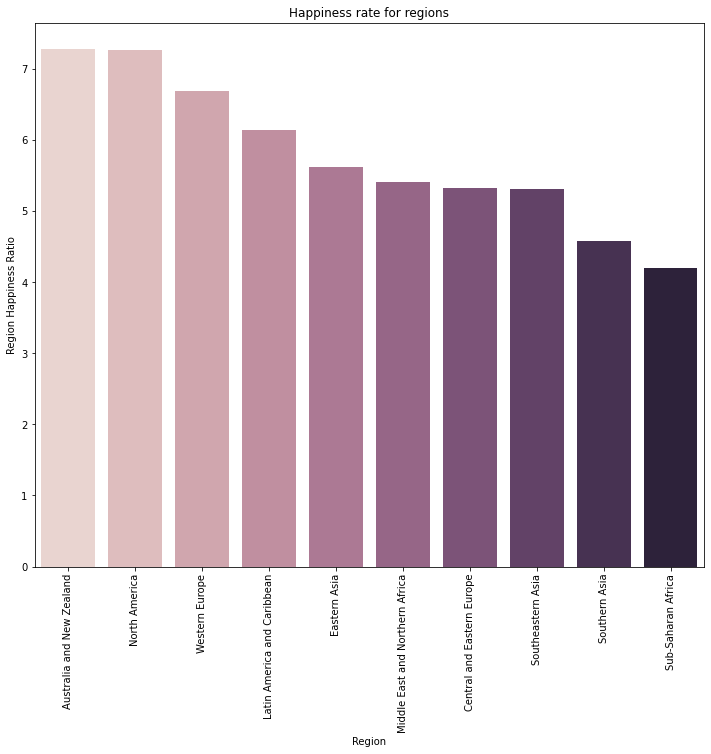

In [18]:
plt.figure(figsize=(12,10))
sns.barplot(x=sorted_table['Regions'], y=sorted_table['region_happiness_ratio'],palette=sns.cubehelix_palette(len(sorted_table['Regions'])))
# Place the region names at a 90-degree angle.
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Happiness rate for regions')
plt.show()

In [17]:
country_list = list(data_2015.Country.unique())
country_happiness_ratio=[]
for each_country in country_list:
    country=data_2015[data_2015['Country']==each_country]
    country_happiness_rate=sum(country.Happiness_Score)/len(country)
    country_happiness_ratio.append(country_happiness_rate)
    
data=pd.DataFrame({'Country':country_list,'country_happiness_ratio':country_happiness_ratio})

modified_indexes=(data['country_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_table = data.reindex(modified_indexes)

sorted_table

Country  country_happiness_ratio
0    Switzerland                    7.587
1        Iceland                    7.561
2        Denmark                    7.527
3         Norway                    7.522
4         Canada                    7.427
..           ...                      ...
153       Rwanda                    3.465
154        Benin                    3.340
155        Syria                    3.006
156      Burundi                    2.905
157         Togo                    2.839

[158 rows x 2 columns]

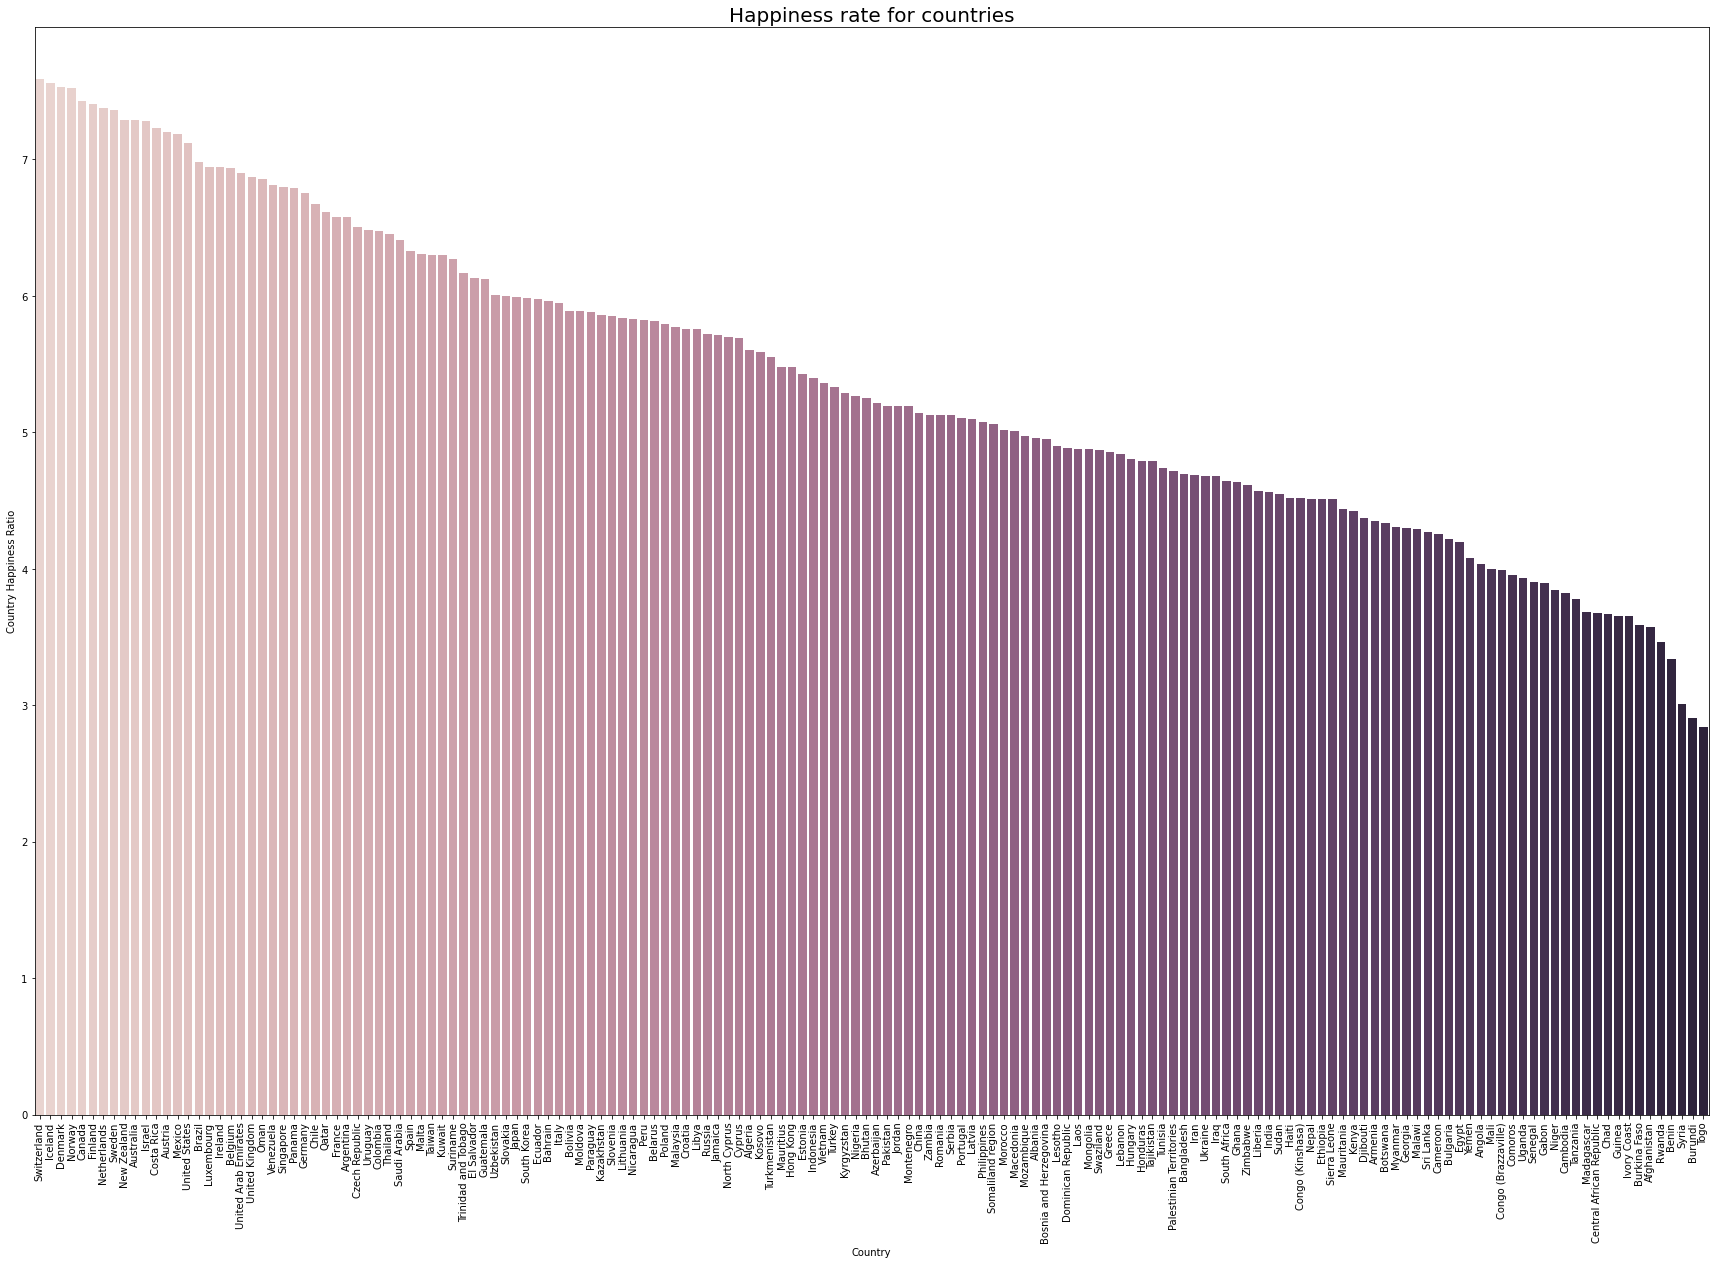

In [18]:
plt.figure(figsize=(30,20))
sns.barplot(x=sorted_table['Country'], y=sorted_table['country_happiness_ratio'],palette=sns.cubehelix_palette(len(sorted_table['Country'])))
# Place the region names at a 90-degree angle.
plt.xticks(rotation= 90)
plt.xlabel('Country')
plt.ylabel('Country Happiness Ratio')
plt.title('Happiness rate for countries', fontsize=20)
plt.show()

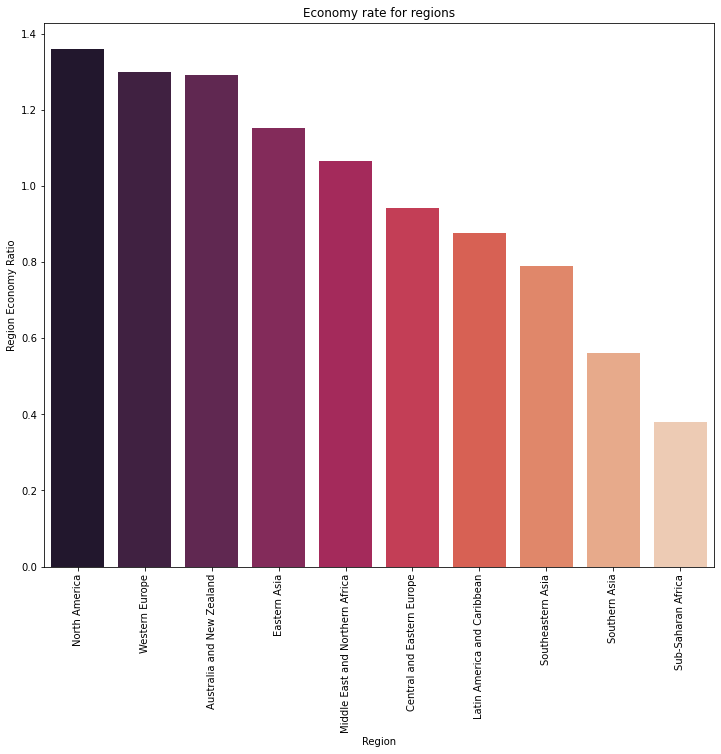

In [19]:
region_lists=list(data_2015['Region'].unique())
region_economy_ratio=[]
for each_region in region_lists:
    region=data_2015[data_2015['Region']==each_region]
    region_economy_rate=sum(region.Economy)/len(region)
    region_economy_ratio.append(region_economy_rate)
    
data_economy=pd.DataFrame({'region':region_lists,'region_economy_ratio':region_economy_ratio})
new_index_economy=(data_economy['region_economy_ratio'].sort_values(ascending=False)).index.values
sorted_data_economy = data_economy.reindex(new_index_economy)


f,ax1 = plt.subplots(figsize =(12,10))
sns.barplot(x=sorted_data_economy['region'], y=sorted_data_economy['region_economy_ratio'],palette="rocket", ax=ax1)
# Place the region names at a 90-degree angle.
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Region Economy Ratio')
plt.title('Economy rate for regions')
plt.show()

# So what factors affect happiness according to regions?

In [20]:
def add_multiple_list(all_lists):
    if(len(all_lists) <=1):
        return all_lists
    total = all_lists[0]
    for i in range(1, len(all_lists)):
        temp = all_lists[i]
        for j in range(0,len(temp)):
            total[j] += temp[j]
    return total

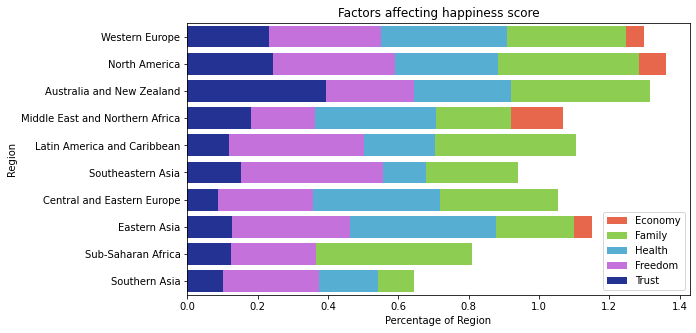

In [24]:
region_lists=list(data_2015['Region'].unique())
share_economy=[]
share_family=[]
share_health=[]
share_freedom=[]
share_trust=[]

for each in region_lists:
    region=data_2015[data_2015['Region']==each]
    share_economy.append(sum(region.Economy)/len(region))
    share_family.append(sum(region.Family)/len(region))
    share_health.append(sum(region.Health)/len(region))
    share_freedom.append(sum(region.Freedom)/len(region))
    share_trust.append(sum(region.Trust)/len(region))


#Visualization
f,ax = plt.subplots(figsize = (9,5))
sns.set_color_codes("pastel")
sns.barplot(x=share_economy,y=region_lists,color='#FF5733',label="Economy")
sns.barplot(x=share_family,y=region_lists,color='#8BE13D',label="Family")
sns.barplot(x=share_health,y=region_lists,color='#41B8E7',label="Health")
sns.barplot(x=share_freedom,y=region_lists,color='#CF5FED',label="Freedom")
sns.barplot(x=share_trust,y=region_lists,color='#1125A6',label="Trust")
ax.legend(loc="lower right",frameon = True)
ax.set(xlabel='Percentage of Region', ylabel='Region',title = "Factors affecting happiness score")
plt.show()

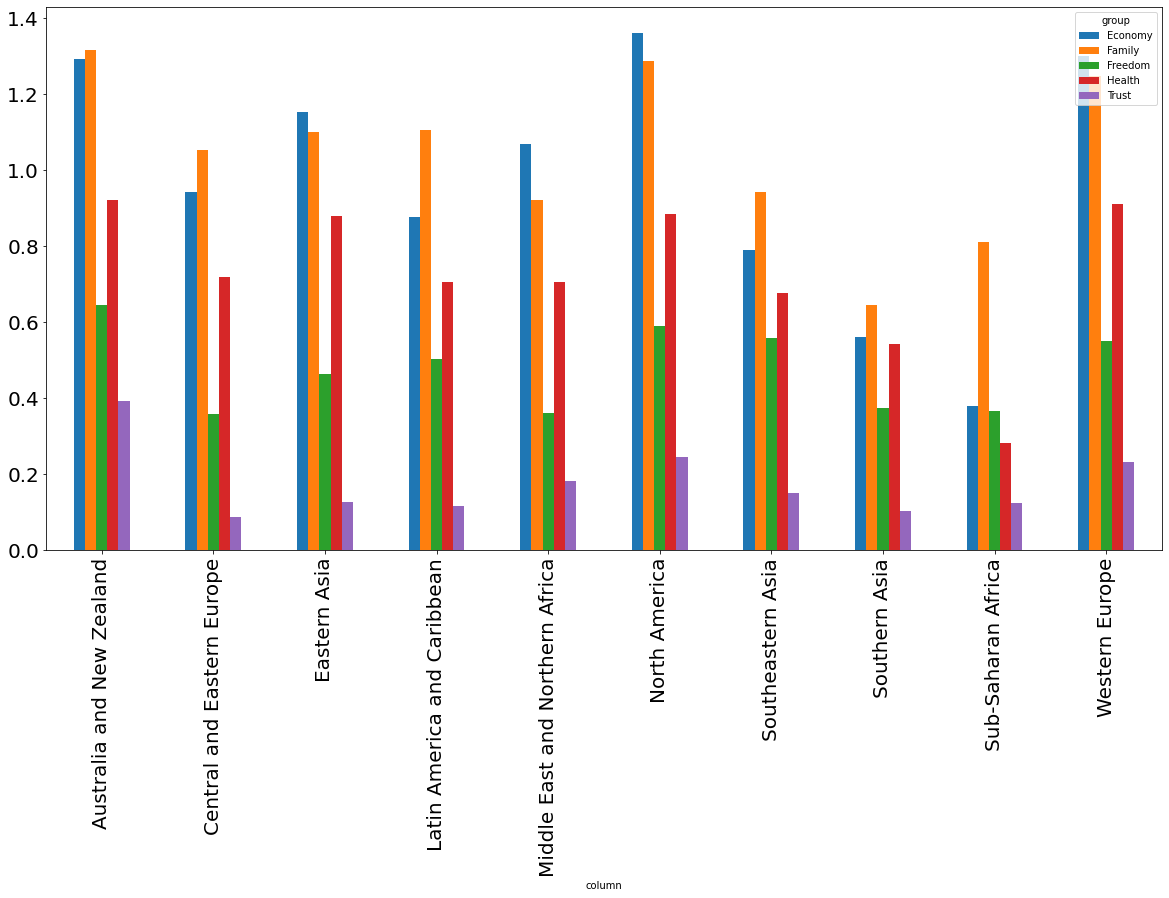

In [43]:

list = []

for i in range(len(region_lists)):
    temp = ['Economy', region_lists[i],share_economy[i] ]
    list.append(temp)
    temp = ['Health', region_lists[i], share_health[i] ]
    list.append(temp)
    temp = ['Family', region_lists[i], share_family[i] ]
    list.append(temp)
    temp = ['Freedom', region_lists[i], share_freedom[i] ]
    list.append(temp)
    temp = ['Trust', region_lists[i], share_trust[i] ]
    list.append(temp)

df = pd.DataFrame(list,columns=['group','column','val'])
df.pivot("column", "group", "val").plot(kind='bar',figsize=(20,10), fontsize=20)



plt.show()

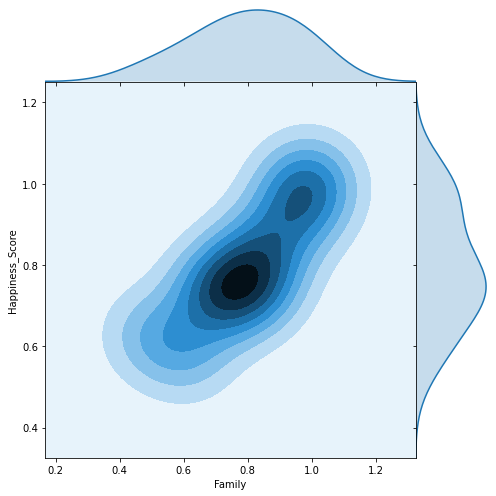

In [41]:
dataframe=pd.pivot_table(data_2015, index = 'Region', values=["Happiness_Score","Family"])
#to normalize
dataframe["Happiness_Score"]=dataframe["Happiness_Score"]/max(dataframe["Happiness_Score"])
dataframe["Family"]=dataframe["Family"]/max(dataframe["Family"])
sns.jointplot(dataframe.Family,dataframe.Happiness_Score,kind="kde",height=7,space=0)
plt.savefig('jointplot.png')
plt.show()

So we find that there is a positive correlation between family and happiness score.

In [47]:
#Linear regression with marginal distributions
g = sns.jointplot("Family", "Happiness_Score", data=dataframe,height=10,kind="reg",ratio=3, color="blue")

NameError: name 'dataframe' is not defined

# These charts are evaluated over the year 2015. So what if we compare it with other years?

In [48]:
# First, let's compare happiness score of years

In [49]:
data_2019

Overall_rank                   Country  Happiness_Score    GDP  \
0               1                   Finland            7.769  1.340   
1               2                   Denmark            7.600  1.383   
2               3                    Norway            7.554  1.488   
3               4                   Iceland            7.494  1.380   
4               5               Netherlands            7.488  1.396   
..            ...                       ...              ...    ...   
151           152                    Rwanda            3.334  0.359   
152           153                  Tanzania            3.231  0.476   
153           154               Afghanistan            3.203  0.350   
154           155  Central African Republic            3.083  0.026   
155           156               South Sudan            2.853  0.306   

     Social_support  Health  Freedom  Generosity  Perceptions  
0             1.587   0.986    0.596       0.153        0.393  
1             1.573   0.996    0.592       0.252        0.410  
2             1.582   1.028    0.603       0.271        0.341  
3             1.624   1.026    0.591       0.354        0.118  
4             1.522   0.999    0.557       0.322        0.298  
..              ...     ...      ...         ...          ...  
151           0.711   0.614    0.555       0.217        0.411  
152           0.885   0.499    0.417       0.276        0.147  
153           0.517   0.361    0.000       0.158        0.025  
154           0.000   0.105    0.225       0.235        0.035  
155           0.575   0.295    0.010       0.202        0.091  

[156 rows x 9 columns]

In [50]:
data_2015['Year']=2015
data_2016['Year']=2016
data_2017['Year']=2017
data_2018['Year']=2018
data_2019['Year']=2019

#concating
data_concat=pd.concat([data_2015,data_2016,data_2017,data_2018,data_2019],axis=0,sort = False)

happiness_score_years=pd.pivot_table(data_concat, index = 'Year', values="Happiness_Score")
happiness_score_years

Happiness_Score
Year                 
2015         5.375734
2016         5.382185
2017         5.354019
2018         5.366897
2019         5.407096

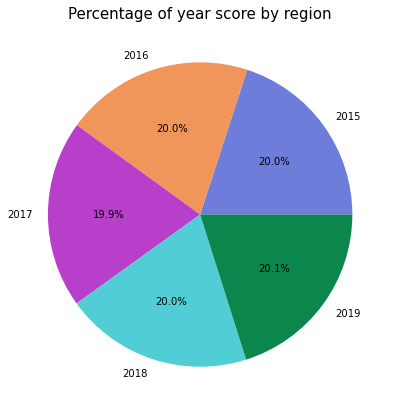

In [51]:
happiness_score_years.dropna(inplace = True)
labels =happiness_score_years.index
colors = ['#6E7CDA','#F1965B','#B73FCA','#51CED5','#0B864C']
explode = [0,0,0,0,0]
sizes = happiness_score_years.values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of year score by region',color = 'black',fontsize = 15)
plt.show()

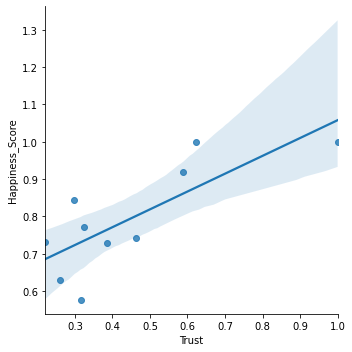

In [52]:
dataframe2=pd.pivot_table(data_2015, index = 'Region', values=["Happiness_Score","Trust"])
#to normalize
dataframe2["Happiness_Score"]=dataframe2["Happiness_Score"]/max(dataframe2["Happiness_Score"])
dataframe2["Trust"]=dataframe2["Trust"]/max(dataframe2["Trust"])
sns.lmplot("Trust","Happiness_Score",data=dataframe2)
plt.show()

# As the perception of corruption decreases, we can say that happiness score also increases.

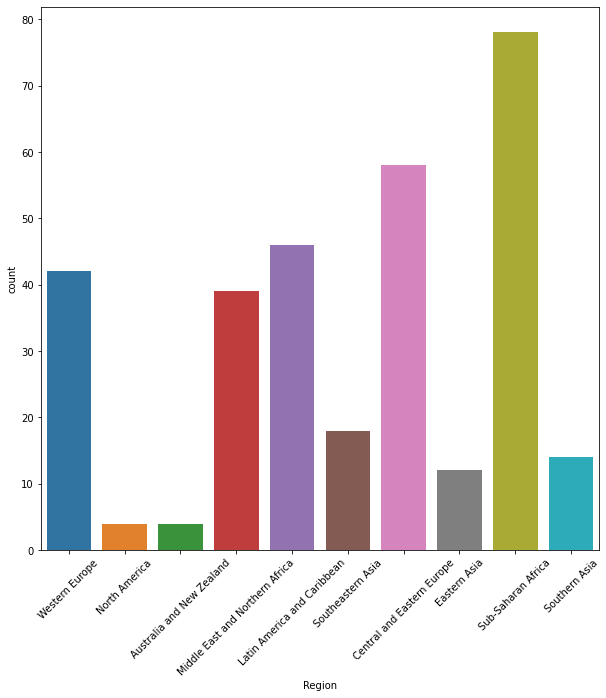

In [53]:
f,ax = plt.subplots(figsize =(10,10))
sns.countplot(data_concat.Region,ax=ax)
plt.xticks(rotation= 45)
plt.show()

# So how do these values appear in the world?

In [54]:
data_2015 = pd.read_csv("world_happiness_report/2015.csv")
data_2016 = pd.read_csv("world_happiness_report/2016.csv")
data_2017 = pd.read_csv("world_happiness_report/2017.csv")

In [55]:
# Let's make a small classification between countries and visualize them.

In [57]:
targets = ['Low', 'Low-Mid', 'Top-Mid', 'Top']
h_cols = ['Country', 'GDP', 'Family', 'Life', 'Freedom', 'Generosity', 'Trust']
def prep_frame(df_year, year):
    df = pd.DataFrame()
    # Work around to load 2015, 2016, 2017 data into one common column
    target_cols = []
    for c in h_cols:
        target_cols.extend([x for x in df_year.columns if c in x])
    df[h_cols] = df_year[target_cols]
    df['Happiness Score'] = df_year[[x for x in df_year.columns if 'Score' in x]]
    # Calculate quartiles on the data.
    df["target"] = pd.qcut(df[df.columns[-1]], len(targets), labels=targets)
    df["target_n"] = pd.qcut(df[df.columns[-2]], len(targets), labels=range(len(targets)))
    # Append year and assign to multi-index
    df['Year'] = year
    df = df.set_index(['Country', 'Year'])
    return df
df = prep_frame(data_2015, 2015)
df = df.append(prep_frame(data_2016, 2016), sort=False)
df = df.append(prep_frame(data_2017, 2017), sort=False)
df

GDP    Family      Life   Freedom  \
Country                  Year                                           
Switzerland              2015  1.396510  1.349510  0.941430  0.665570   
Iceland                  2015  1.302320  1.402230  0.947840  0.628770   
Denmark                  2015  1.325480  1.360580  0.874640  0.649380   
Norway                   2015  1.459000  1.330950  0.885210  0.669730   
Canada                   2015  1.326290  1.322610  0.905630  0.632970   
...                                 ...       ...       ...       ...   
Rwanda                   2017  0.368746  0.945707  0.326425  0.581844   
Syria                    2017  0.777153  0.396103  0.500533  0.081539   
Tanzania                 2017  0.511136  1.041990  0.364509  0.390018   
Burundi                  2017  0.091623  0.629794  0.151611  0.059901   
Central African Republic 2017  0.000000  0.000000  0.018773  0.270842   

                               Generosity     Trust  Happiness Score target  \
Country                  Year                                                 
Switzerland              2015    0.296780  0.419780            7.587    Top   
Iceland                  2015    0.436300  0.141450            7.561    Top   
Denmark                  2015    0.341390  0.483570            7.527    Top   
Norway                   2015    0.346990  0.365030            7.522    Top   
Canada                   2015    0.458110  0.329570            7.427    Top   
...                                   ...       ...              ...    ...   
Rwanda                   2017    0.252756  0.455220            3.471    Low   
Syria                    2017    0.493664  0.151347            3.462    Low   
Tanzania                 2017    0.354256  0.066035            3.349    Low   
Burundi                  2017    0.204435  0.084148            2.905    Low   
Central African Republic 2017    0.280876  0.056565            2.693    Low   

                              target_n  
Country                  Year           
Switzerland              2015        3  
Iceland                  2015        3  
Denmark                  2015        3  
Norway                   2015        3  
Canada                   2015        3  
...                                ...  
Rwanda                   2017        0  
Syria                    2017        0  
Tanzania                 2017        0  
Burundi                  2017        0  
Central African Republic 2017        0  

[470 rows x 9 columns]

In [58]:
correlation_spearman = df.corr(method='spearman')
correlation_spearman

GDP    Family      Life   Freedom  Generosity     Trust  \
GDP              1.000000  0.584480  0.803493  0.374744    0.006568  0.214877   
Family           0.584480  1.000000  0.490872  0.454714    0.080144  0.098352   
Life             0.803493  0.490872  1.000000  0.382680    0.086622  0.175155   
Freedom          0.374744  0.454714  0.382680  1.000000    0.383047  0.458121   
Generosity       0.006568  0.080144  0.086622  0.383047    1.000000  0.231411   
Trust            0.214877  0.098352  0.175155  0.458121    0.231411  1.000000   
Happiness Score  0.800252  0.627502  0.760712  0.554569    0.153457  0.305066   

                 Happiness Score  
GDP                     0.800252  
Family                  0.627502  
Life                    0.760712  
Freedom                 0.554569  
Generosity              0.153457  
Trust                   0.305066  
Happiness Score         1.000000

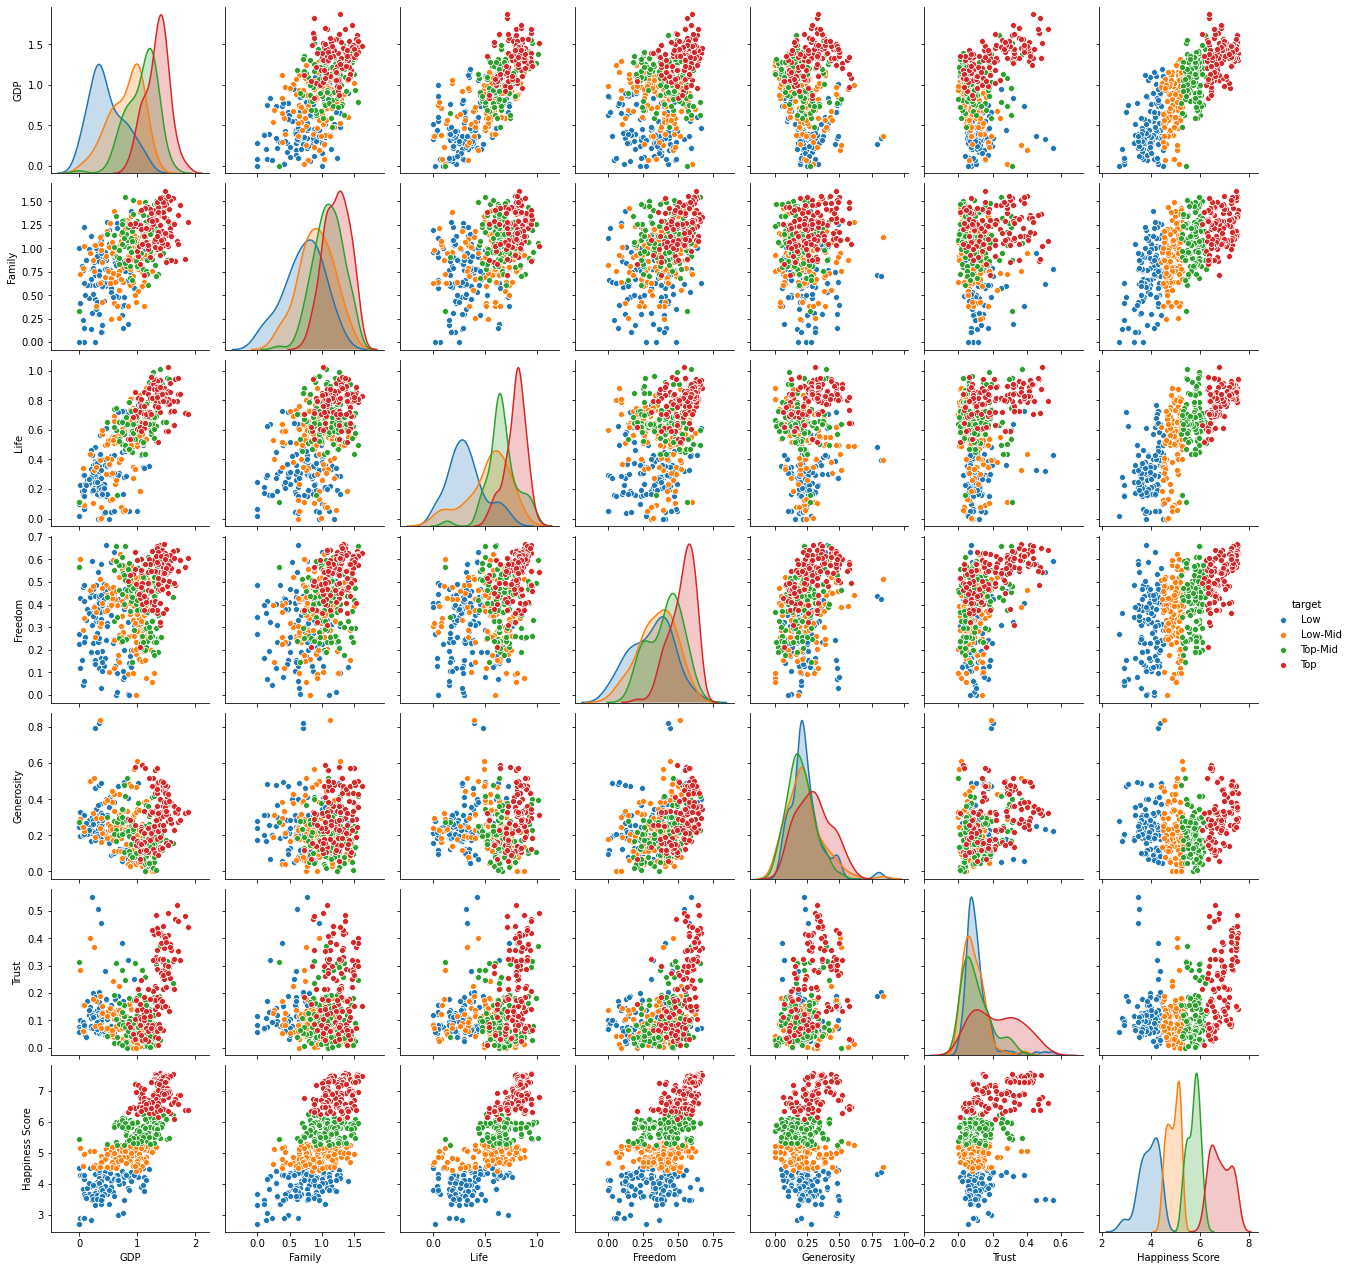

In [59]:
sns.pairplot(df.drop(['target_n'], axis=1), hue='target')


In [71]:
import plotly.graph_objs as go
from plotly.offline import iplot
data = dict(type = 'choropleth', 
           locations = data_2015['Country'],
           locationmode = 'country names',
           z = data_2015['Happiness Score'], 
           text = data_2015['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Index 2015', 
             geo = dict(showframe = False 
                       ))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)